In [33]:
import pandas as pd
import numpy as np
import math

In [34]:
# read the csv file
random_df = pd.read_csv('random_results.csv')
random_df.groupby('Data Reuploading Reps').mean().drop(columns=["Row"])

,Trainability,Mean Loss,Min Loss
Data Reuploading Reps,,,
1,0.499295,0.499979,0.000111
2,0.500589,0.500887,0.000137
3,0.499254,0.499651,0.000119
4,0.500224,0.500339,0.000116
5,0.499454,0.499895,0.000127
10,0.498466,0.498738,0.000119
20,0.500550,0.501002,0.000124


In [35]:
# read datasets
df1 = pd.read_csv('../new_results/results_1.csv')
df2 = pd.read_csv('../new_results/results_2.csv')
df3 = pd.read_csv('../new_results/results_3.csv')
df4 = pd.read_csv('../new_results/results_4.csv')
df5 = pd.read_csv('../new_results/results_5.csv')
df10 = pd.read_csv('../new_results/results_10.csv')
df20 = pd.read_csv('../new_results/results_20.csv')

# merge datasets
df = pd.concat([df1, df2, df3, df4, df5, df10, df20]).reset_index(drop=True)

# save merged dataset
df.to_csv('merged_results.csv', index=False)
df

,Data Reuploading Reps,Row,Expressibility,Trainability CrossEntropy,Min CrossEntropy,Max CrossEntropy,Mean CrossEntropy,Median CrossEntropy,Hist CrossEntropy,Trainability Fidelity,Min Loss Fidelity,Max Loss Fidelity,Mean Loss Fidelity,Median Loss Fidelity,Hist Loss Fidelity
0,1,0,0.447179,0.620165,0.006263,2.193087,0.585886,0.345371,[1697 642 401 315 221 200 151 153 140 ...,0.070057,0.281648,1.000000,0.968989,0.995503,[ 0 0 0 0 2 3 7 6 11 ...
1,1,1,0.459347,0.496317,0.020108,1.616757,0.523588,0.345438,[1683 669 448 331 279 270 320 0 0 ...,0.070700,0.272933,1.000000,0.969105,0.995706,[ 0 0 0 0 4 2 7 7 7 ...
2,1,2,0.605257,0.351315,0.057301,1.111518,0.452647,0.347542,[1588 786 578 476 572 0 0 0 0 ...,0.074140,0.195520,1.000000,0.968701,0.996680,[ 0 0 1 2 1 6 5 3 19 ...
3,1,3,0.533660,0.676999,0.003251,2.519448,0.618572,0.347794,[1663 636 433 290 213 185 152 117 115 ...,0.074482,0.184298,1.000000,0.968868,0.995913,[ 0 0 1 2 2 4 6 8 12 ...
4,1,4,0.443196,0.774044,0.000619,3.347398,0.650194,0.345344,[1702 629 391 301 204 186 132 106 88 ...,0.065824,0.390871,1.000000,0.968882,0.996027,[ 0 0 0 0 0 1 3 8 7 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,20,195,1.171910,0.089932,0.132539,0.827819,0.352690,0.345413,[ 371 3290 336 3 0 0 0 0 0 ...,0.031122,0.738559,0.999997,0.968012,0.977647,[ 0 0 0 0 0 0 0 0 0 ...
1396,20,196,1.178928,0.089793,0.119434,0.765707,0.355048,0.347058,[ 326 3321 348 5 0 0 0 0 0 ...,0.030649,0.761336,0.999999,0.968073,0.977049,[ 0 0 0 0 0 0 0 0 0 ...
1397,20,197,1.184363,0.091207,0.117340,0.799342,0.355771,0.347565,[ 349 3275 372 4 0 0 0 0 0 ...,0.030480,0.744975,0.999983,0.968772,0.978196,[ 0 0 0 0 0 0 0 0 0 ...
1398,20,198,1.177056,0.090411,0.129067,0.830224,0.351886,0.342126,[ 372 3274 351 3 0 0 0 0 0 ...,0.029630,0.700345,0.999981,0.968608,0.977541,[ 0 0 0 0 0 0 0 0 0 ...


In [36]:
# Drop if fidelity in column name
df_clean = df.drop(columns=[col for col in df.columns if 'Fidelity' in col])
df_clean = df_clean.drop(columns=["Hist CrossEntropy"])
# Rename "Trainability-module" to "Trainability" and "Min Loss-module" to "Min Loss"
df_clean = df_clean.rename(columns={"Trainability CrossEntropy": "Loss Dispersion", "Mean CrossEntropy": "Mean Loss", "Median CrossEntropy": "Median Loss", "Min CrossEntropy": "Min Loss", "Max CrossEntropy": "Max Loss"})
# Save cleaned dataset
df_clean.to_csv('ce_cleaned_results.csv', index=False)
df_clean

,Data Reuploading Reps,Row,Expressibility,Loss Dispersion,Min Loss,Max Loss,Mean Loss,Median Loss
0,1,0,0.447179,0.620165,0.006263,2.193087,0.585886,0.345371
1,1,1,0.459347,0.496317,0.020108,1.616757,0.523588,0.345438
2,1,2,0.605257,0.351315,0.057301,1.111518,0.452647,0.347542
3,1,3,0.533660,0.676999,0.003251,2.519448,0.618572,0.347794
4,1,4,0.443196,0.774044,0.000619,3.347398,0.650194,0.345344
...,...,...,...,...,...,...,...,...
1395,20,195,1.171910,0.089932,0.132539,0.827819,0.352690,0.345413
1396,20,196,1.178928,0.089793,0.119434,0.765707,0.355048,0.347058
1397,20,197,1.184363,0.091207,0.117340,0.799342,0.355771,0.347565
1398,20,198,1.177056,0.090411,0.129067,0.830224,0.351886,0.342126


In [37]:
df_clean.groupby('Data Reuploading Reps').mean().drop(columns=["Row"])

,Expressibility,Loss Dispersion,Min Loss,Max Loss,Mean Loss,Median Loss
Data Reuploading Reps,,,,,,
1,0.492817,0.594953,0.023085,2.244958,0.573832,0.346477
2,0.782833,0.188371,0.055783,1.129925,0.379177,0.346672
3,1.129733,0.107869,0.106235,0.838877,0.358110,0.346728
4,1.174677,0.090078,0.116652,0.776303,0.354813,0.346895
5,1.179139,0.089789,0.120543,0.781143,0.354443,0.346639
10,1.178317,0.090535,0.118268,0.788862,0.354431,0.346573
20,1.180313,0.090467,0.118164,0.793422,0.354580,0.346822


In [38]:
# Compute the error for each row
df_clean['Mean Loss Error'] = df_clean['Loss Dispersion']  / np.sqrt(4_000)
df_clean['Loss Dispersion Error'] = df_clean['Loss Dispersion'] / np.sqrt(2*(4_000-1))
df_clean

,Data Reuploading Reps,Row,Expressibility,Loss Dispersion,Min Loss,Max Loss,Mean Loss,Median Loss,Mean Loss Error,Loss Dispersion Error
0,1,0,0.447179,0.620165,0.006263,2.193087,0.585886,0.345371,0.009806,0.006935
1,1,1,0.459347,0.496317,0.020108,1.616757,0.523588,0.345438,0.007847,0.005550
2,1,2,0.605257,0.351315,0.057301,1.111518,0.452647,0.347542,0.005555,0.003928
3,1,3,0.533660,0.676999,0.003251,2.519448,0.618572,0.347794,0.010704,0.007570
4,1,4,0.443196,0.774044,0.000619,3.347398,0.650194,0.345344,0.012239,0.008655
...,...,...,...,...,...,...,...,...,...,...
1395,20,195,1.171910,0.089932,0.132539,0.827819,0.352690,0.345413,0.001422,0.001006
1396,20,196,1.178928,0.089793,0.119434,0.765707,0.355048,0.347058,0.001420,0.001004
1397,20,197,1.184363,0.091207,0.117340,0.799342,0.355771,0.347565,0.001442,0.001020
1398,20,198,1.177056,0.090411,0.129067,0.830224,0.351886,0.342126,0.001430,0.001011


In [39]:
# Save cleaned dataset with errors
df_clean.to_csv('cleaned_results_with_errors.csv', index=False)

In [50]:
# Compute the means for each repetition and the corresponding errors
df_metrics = df_clean.groupby('Data Reuploading Reps').agg({'Expressibility': 'mean', 'Loss Dispersion': 'mean', 'Min Loss': 'mean', 'Mean Loss': 'mean', 'Max Loss': 'mean', 'Median Loss': 'mean'}).reset_index()
# Rename columns
df_metrics = df_metrics.rename(columns={"Expressibility": "Mean Expressibility", "Loss Dispersion": "Mean Loss Dispersion", "Min Loss": "Mean Min Loss", "Mean Loss": "Mean Mean Loss", "Max Loss": "Mean Max Loss", "Median Loss": "Mean Median Loss"})
# Compute the errors
df_metrics['Expressibility Error'] = df_clean.groupby('Data Reuploading Reps').agg({'Expressibility': 'std'}).reset_index()['Expressibility'] / np.sqrt(200)
# Compute the mean of the stds (for each rep: np.sqrt((df_clean['Loss Dispersion Error'] ** 2).sum()) / 200)
df_metrics['Mean Loss Dispersion Error'] = df_clean.groupby('Data Reuploading Reps').agg({'Loss Dispersion Error': lambda x: np.sqrt((x ** 2).sum())}).reset_index()['Loss Dispersion Error'] / 200
# Same for the Mean Loss Error
df_metrics['Mean Mean Loss Error'] = df_clean.groupby('Data Reuploading Reps').agg({'Mean Loss Error': lambda x: np.sqrt((x ** 2).sum())}).reset_index()['Mean Loss Error'] / 200
# Median Loss Error
df_metrics.drop(columns=["Mean Median Loss"])

,Data Reuploading Reps,Mean Expressibility,Mean Loss Dispersion,Mean Min Loss,Mean Mean Loss,Mean Max Loss,Expressibility Error,Mean Loss Dispersion Error,Mean Mean Loss Error
0,1,0.492817,0.594953,0.023085,0.573832,2.244958,0.011064,0.000490,0.000692
1,2,0.782833,0.188371,0.055783,0.379177,1.129925,0.002995,0.000150,0.000212
2,3,1.129733,0.107869,0.106235,0.358110,0.838877,0.000888,0.000085,0.000121
3,4,1.174677,0.090078,0.116652,0.354813,0.776303,0.000328,0.000071,0.000101
4,5,1.179139,0.089789,0.120543,0.354443,0.781143,0.000184,0.000071,0.000100
5,10,1.178317,0.090535,0.118268,0.354431,0.788862,0.000248,0.000072,0.000101
6,20,1.180313,0.090467,0.118164,0.354580,0.793422,0.000330,0.000072,0.000101


In [41]:
# Save the means with errors
df_metrics.to_csv('means_with_errors.csv', index=False)

In [42]:
df_figures = df_metrics.drop(columns=["Expressibility Error", "Mean Loss Dispersion Error", "Mean Mean Loss Error"]).reset_index(drop=True)
grouped_stds = df_clean.groupby('Data Reuploading Reps').std().drop(columns=["Row"]).reset_index()
df_figures["Mean Expressibility Std"] = grouped_stds["Expressibility"]
df_figures["Mean Loss Dispersion Std"] = grouped_stds["Loss Dispersion"]
df_figures["Mean Mean Loss Std"] = grouped_stds["Mean Loss"]
df_figures["Mean Median Loss Std"] = grouped_stds["Median Loss"]
df_figures["Mean Min Loss Std"] = grouped_stds["Min Loss"]
df_figures["Mean Max Loss Std"] = grouped_stds["Max Loss"]
df_figures

,Data Reuploading Reps,Mean Expressibility,Mean Loss Dispersion,Mean Min Loss,Mean Mean Loss,Mean Max Loss,Mean Median Loss,Mean Expressibility Std,Mean Loss Dispersion Std,Mean Mean Loss Std,Mean Median Loss Std,Mean Min Loss Std,Mean Max Loss Std
0,1,0.492817,0.594953,0.023085,0.573832,2.244958,0.346477,0.156469,0.172359,0.080215,0.001150,0.050186,0.798814
1,2,0.782833,0.188371,0.055783,0.379177,1.129925,0.346672,0.042358,0.023355,0.006759,0.000918,0.018750,0.113532
2,3,1.129733,0.107869,0.106235,0.358110,0.838877,0.346728,0.012553,0.006670,0.002722,0.001271,0.011822,0.050424
3,4,1.174677,0.090078,0.116652,0.354813,0.776303,0.346895,0.004633,0.002474,0.002475,0.002692,0.014404,0.041670
4,5,1.179139,0.089789,0.120543,0.354443,0.781143,0.346639,0.002602,0.000787,0.000978,0.001446,0.008940,0.053381
5,10,1.178317,0.090535,0.118268,0.354431,0.788862,0.346573,0.003512,0.001269,0.001110,0.001221,0.013654,0.051729
6,20,1.180313,0.090467,0.118164,0.354580,0.793422,0.346822,0.004672,0.000851,0.001646,0.001705,0.009814,0.049335


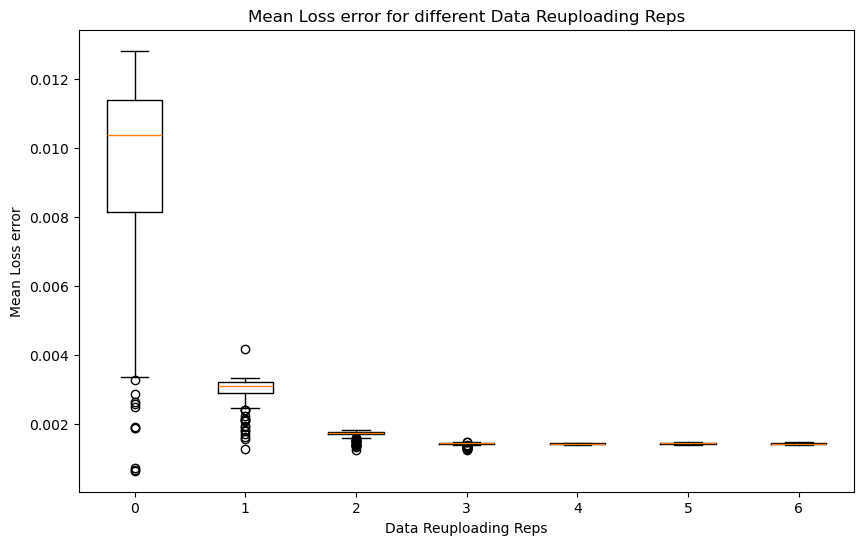

In [43]:
# create a boxplot for mean loss error
import matplotlib.pyplot as plt

# group by 'Data Reuploading Reps' and aggreate the mean loss error with list
mle = df_clean.groupby('Data Reuploading Reps').agg({'Mean Loss Error': list}).reset_index()['Mean Loss Error']

# Get the positions for the x-axis
positions = range(len(mle))

plt.figure(figsize=(10, 6))
plt.boxplot(mle, positions=positions)
plt.xlabel('Data Reuploading Reps')
plt.ylabel('Mean Loss error')
plt.title('Mean Loss error for different Data Reuploading Reps')
plt.xticks(positions, mle.index)
plt.show()

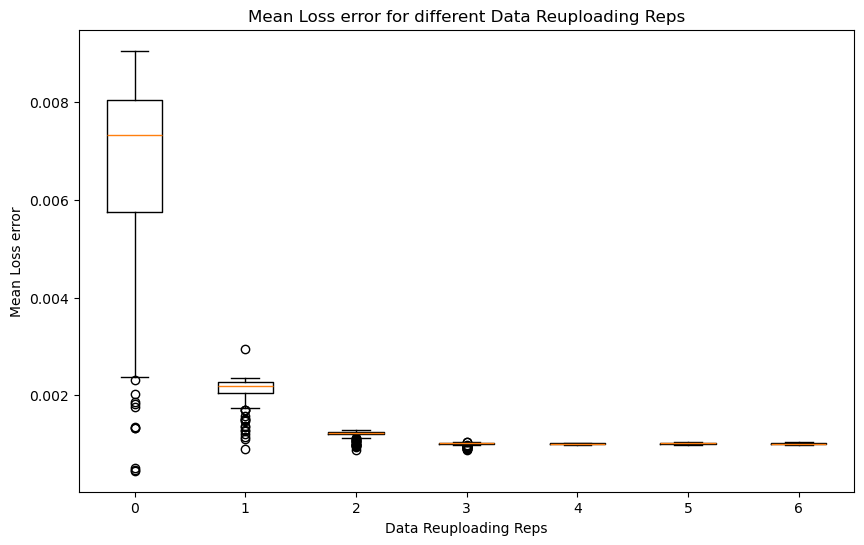

In [44]:
# boxplot for errors
import matplotlib.pyplot as plt
# Get the positions for the x-axis
lde = df_clean.groupby('Data Reuploading Reps').agg({'Loss Dispersion Error': list}).reset_index()['Loss Dispersion Error']
positions = range(len(lde))

plt.figure(figsize=(10, 6))
plt.boxplot(lde, positions=positions)
plt.xlabel('Data Reuploading Reps')
plt.ylabel('Mean Loss error')
plt.title('Mean Loss error for different Data Reuploading Reps')
plt.xticks(positions, lde.index)
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(df:pd.DataFrame, save=False):
    """
    Generate graphs from a pandas DataFrame.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data with columns:
            'Data Reuploading Reps', 'Expressibility', 'Trainability-'{method}, 'Mean Loss-'+interpret_method, 'Min Loss-'+interpret_method.
        mode (str, optional): 'combined' for one graph with all metrics or 
                              'separate' for individual graphs per metric.
                              Defaults to 'separate'.
    """
           # Positions on x-axis
    x_labels = df['Data Reuploading Reps'].astype(int)       # Label them with 'Data Reuploading Reps'
    # max value of x_labels
    x_positions = list(range(1, x_labels.max()+1))
    colors = {                                       # Define colors for each metric
        'First': '#046bb4',
        'Second': '#5591c8',
        'Third': '#c3dbeb',
        'Support 1': '#101010',
        'Support 2': "#444444"
    }
        
    for metric in ['Mean Expressibility', 'Mean Loss Dispersion']:
        plt.figure(figsize=(6, 4))
        means = df[metric].to_numpy(dtype=float)             # Get the mean values
        stds = df[f'{metric} Std'].to_numpy(dtype=float)          # Get the standard deviations
        # Plot the mean line with markers
        plt.plot(
            x_labels,
            means,
            marker='o',
            color=colors['First'],
            linestyle='-',
            label=metric
        )

        # Plot the shaded confidence interval (mean ± std)
        plt.fill_between(
            x_labels,
            means - stds,
            means + stds,
            color=colors['First'],
            alpha=0.2,
            label='Stds.'
        )

        # Set y axis from 0 to ln(150)
        if metric == 'Mean Expressibility':
            plt.ylim(0, math.log(150))
        
        plt.xticks(x_positions, x_positions)
        plt.xlabel('Data Reuploading Reps', fontsize=12)
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs. Data Reuploading Reps', fontsize=14)
        plt.legend()

        # Save each figure if required
        if save:
            # Create a filename based on the metric name.
            filename = f"{metric.lower().replace(' ', '_')}_vs_Data Reuploading Reps.png"
            plt.savefig(filename, bbox_inches='tight')

    plt.figure(figsize=(6, 4))
    means = df['Mean Mean Loss'].to_numpy(dtype=float)             # Get the mean values
    stds = df['Mean Mean Loss Std'].to_numpy(dtype=float)          # Get the standard deviations
    plt.plot(x_labels,
            means,
            marker='o',
            color=colors['First'],
            linestyle='-',
            label='Avg. Mean Loss')
    plt.fill_between(
        x_labels,
        means - stds,
        means + stds,
        color=colors['First'],
        alpha=0.2,
        label='Stds.'
    )
    means = df['Mean Min Loss'].to_numpy(dtype=float)             # Get the mean values
    stds = df['Mean Min Loss Std'].to_numpy(dtype=float)          # Get the standard deviations
    plt.plot(x_labels,
            df['Mean Min Loss'],
            marker='x',
            color=colors['Second'],
            linestyle='dotted',
            label='Avg. Min. Loss')
    
    means = df['Mean Max Loss'].to_numpy(dtype=float)             # Get the mean values
    stds = df['Mean Max Loss Std'].to_numpy(dtype=float)          # Get the standard deviations
    plt.plot(x_labels,
            df['Mean Max Loss'],
            marker='x',
            color=colors['Third'],
            linestyle='dotted',
            label='Avg. Max Loss')
    
    # Arrow pointing to the best trade-off
    best_tradeoff = df['Mean Mean Loss'].to_list()[1]
    plt.annotate('Best Trade-off', xy=(2, best_tradeoff), xytext=(2.5, best_tradeoff+0.175),
            arrowprops=dict(facecolor=colors['Support 1'], shrink=0.15),
            )
    
    #Add straigth line
    plt.axhline(y=np.log(2)/2, color=colors['Support 2'], linestyle='--', label='Offset (Uniform Classifier)')
    #plt.axvline(x=2, color=colors['Support 1'], linestyle='-', alpha=0.1, label='Best Trade-off')

    # Add vertical lines connecting Avg. Mean Loss to Avg. Min. Loss and Avg. Max Loss
    for i in range(len(x_labels)):
        mean_loss = df['Mean Mean Loss'][i]
        min_loss = df['Mean Min Loss'][i]
        max_loss = df['Mean Max Loss'][i]
        
        plt.plot([x_labels[i], x_labels[i]], [min_loss, mean_loss], color='gray', linestyle='-', linewidth=1.5, alpha=0.2)

        # Add small horizontal caps at the ends
        plt.plot([x_labels[i] - 0.2, x_labels[i] + 0.2], [min_loss, min_loss], color='gray', linewidth=1.5, alpha=0.2)
        plt.plot([x_labels[i] - 0.2, x_labels[i] + 0.2], [mean_loss, mean_loss], color='gray', linewidth=1.5, alpha=0.2)

        plt.plot([x_labels[i], x_labels[i]], [max_loss, mean_loss], color='gray', linestyle='-', linewidth=1.5, alpha=0.2)

        # Add small horizontal caps at the ends
        plt.plot([x_labels[i] - 0.2, x_labels[i] + 0.2], [max_loss, max_loss], color='gray', linewidth=1.5, alpha=0.2)
        plt.plot([x_labels[i] - 0.2, x_labels[i] + 0.2], [mean_loss, mean_loss], color='gray', linewidth=1.5, alpha=0.2)

    plt.ylim(0, 1.5)

    plt.xticks(x_positions, x_positions)
    plt.xlabel('Data Reuploading Reps', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Non optimized Loss vs. Data Reuploading Reps', fontsize=14)
    plt.legend(fontsize=10)

    if save:
            # Create a filename based on the metric name.
            filename = "Loss_vs_Data Reuploading Reps.png"
            plt.savefig(filename, bbox_inches='tight')
    
    # Show the plots
    plt.show()


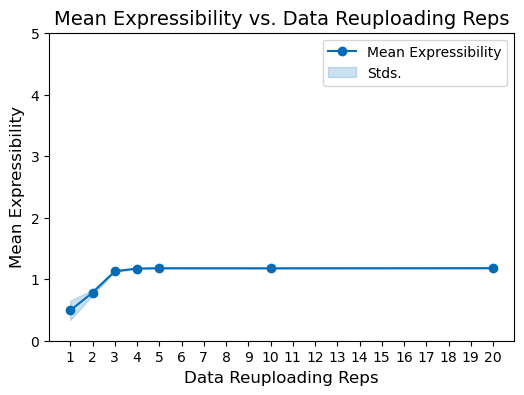

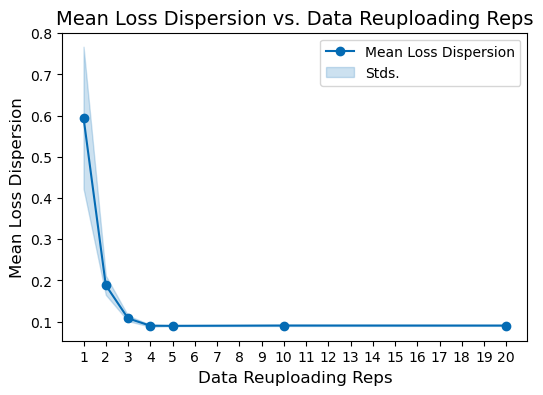

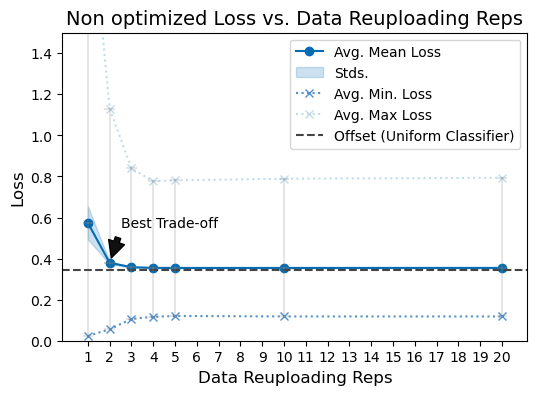

In [54]:
plot_metrics(df_figures, save=True)